In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import to_categorical

Load CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Normalize pixel values to between 0 and 1

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

One-hot encode the labels

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Choose between ResNet50 or VGG16

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Freeze the convolutional base

In [6]:
for layer in base_model.layers:
    layer.trainable = False

Add custom dense layers

In [7]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

Create the final model

In [8]:
model = Model(inputs=base_model.input, outputs=predictions)

Compile the model

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [10]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 734s 937ms/step - accuracy: 0.4744 - loss: 1.5021 - val_accuracy: 0.5702 - val_loss: 1.2294
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 714s 901ms/step - accuracy: 0.5888 - loss: 1.1700 - val_accuracy: 0.5766 - val_loss: 1.2036
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 739s 897ms/step - accuracy: 0.6176 - loss: 1.0957 - val_accuracy: 0.6018 - val_loss: 1.1346
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 704s 849ms/step - accuracy: 0.6339 - loss: 1.0370 - val_accuracy: 0.6075 - val_loss: 1.1270
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 682s 850ms/step - accuracy: 0.6498 - loss: 0.9954 - val_accuracy: 0.6136 - val_loss: 1.1056
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 681s 848ms/step - accuracy: 0.6705 - loss: 0.9403 - val_accuracy: 0.6177 - val_loss: 1.1000
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 679s 844ms/step - accuracy: 0.6825 - loss: 0.9114 - val_accuracy: 0.6120 - val_loss: 1.1214
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 682s 844ms/step - accuracy: 0.6979 -

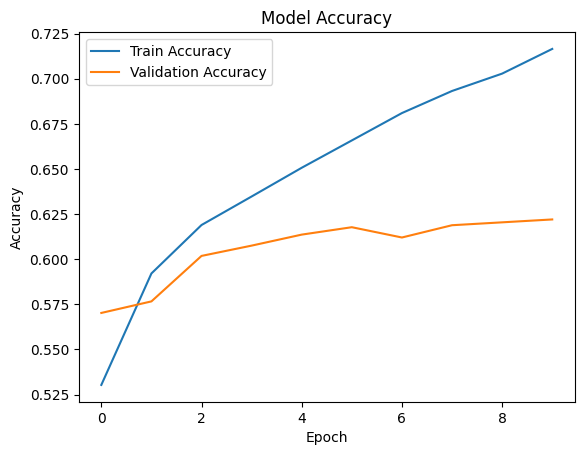

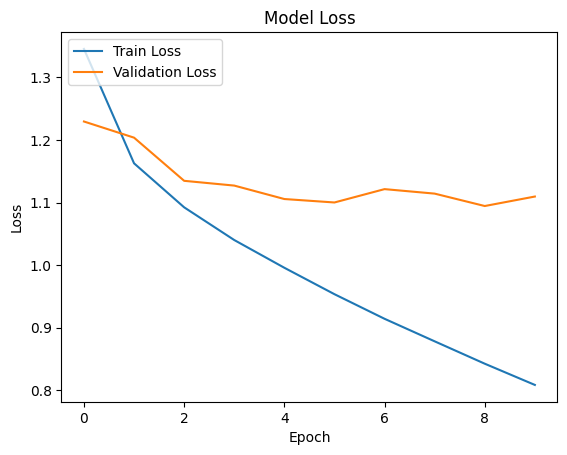

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Evaluate the model on the test set

In [13]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 421ms/step


Calculate accuracy, precision, and recall

In [14]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

In [15]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.622
Precision: 0.620814607307124
Recall: 0.622


In [16]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.65      0.74      0.69      1000
           2       0.51      0.58      0.54      1000
           3       0.47      0.39      0.43      1000
           4       0.61      0.50      0.55      1000
           5       0.59      0.48      0.53      1000
           6       0.59      0.74      0.66      1000
           7       0.69      0.69      0.69      1000
           8       0.77      0.72      0.74      1000
           9       0.65      0.63      0.64      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

